<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [2]:
from tqdm import tqdm_notebook

In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [5]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df_wine.loc[:, 'quality'] = (df_wine.loc[:, 'quality'] > 5).astype(int)

In [8]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

In [9]:
X[:10]

array([[  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90000000e+00,   7.60000000e-02,   1.10000000e+01,
          3.40000000e+01,   9.97800000e-01,   3.51000000e+00,
          5.60000000e-01,   9.40000000e+00],
       [  7.80000000e+00,   8.80000000e-01,   0.00000000e+00,
          2.60000000e+00,   9.80000000e-02,   2.50000000e+01,
          6.70000000e+01,   9.96800000e-01,   3.20000000e+00,
          6.80000000e-01,   9.80000000e+00],
       [  7.80000000e+00,   7.60000000e-01,   4.00000000e-02,
          2.30000000e+00,   9.20000000e-02,   1.50000000e+01,
          5.40000000e+01,   9.97000000e-01,   3.26000000e+00,
          6.50000000e-01,   9.80000000e+00],
       [  1.12000000e+01,   2.80000000e-01,   5.60000000e-01,
          1.90000000e+00,   7.50000000e-02,   1.70000000e+01,
          6.00000000e+01,   9.98000000e-01,   3.16000000e+00,
          5.80000000e-01,   9.80000000e+00],
       [  7.40000000e+00,   7.00000000e-01,   0.00000000e+00,
          1.90

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [12]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

In [18]:
scores = []

for d in xrange(1, 20):
    model = DecisionTreeClassifier(max_depth=d, random_state=123)
    scores.append(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean())

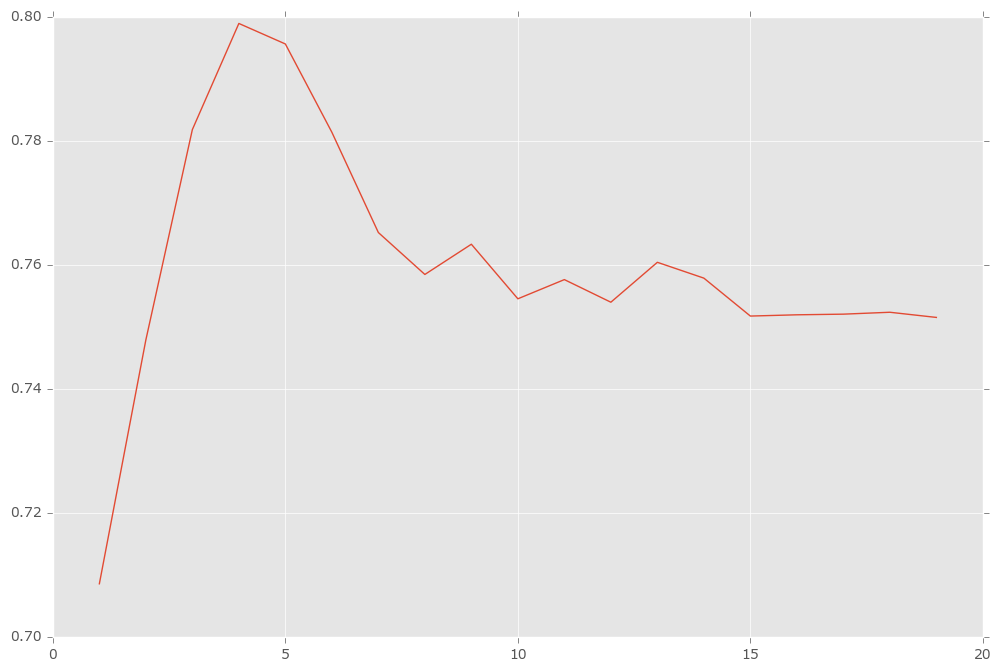

In [19]:
plt.plot(range(1,20), scores)

In [46]:
# При мере качества roc-auc виден явный пик на глубине 4
# Если выбрать меру качества accuracy, то выбрать оптимальную глубину окажется не так просто.

# Воспользуемся validation_curve
# По сути - этот метод делает тоже самое что наш цикл с cross_val_score, но в результате возвращаются мера качества
# как на тестовой части каждого из фолдов, так и на обучающей части

In [54]:
model = DecisionTreeClassifier(random_state=123)
train_scores, test_scores = validation_curve(model, X_train, y_train, 'max_depth',
                                             range(1, 20), n_jobs=-1, cv=5, scoring='roc_auc')

In [52]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

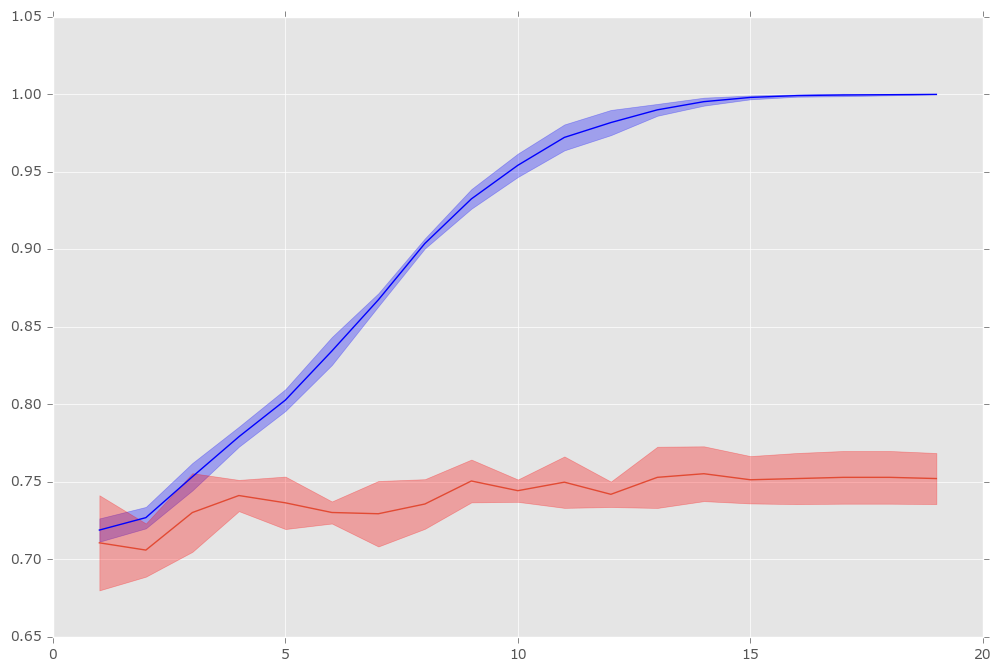

In [53]:
d = range(1,20)
plt.plot(d, train_mean, color='b')
plt.plot(d, test_mean)

plt.fill_between(d, train_mean-train_std, train_mean+train_std, color='b', alpha=0.3)
plt.fill_between(d, test_mean-test_std, test_mean+test_std, color='r', alpha=0.3)

In [50]:
# При roc-auc видем тот же самый пик
# Если выбрать меру качества accuracy, то на той глубине, где accuracy был наибольший (где-то в районе 13) ошибка на 
# на трейновой части минимальная - то есть очень сильное переобучение.

# Основываясь, во-первых, на том, что по roc-auc виден пик при max_depth=4, и во-вторых на том, что переобучение по 
# accuracy не такое сильное при max_depth=4, а качество будет повыше, чем в окрестности, то я бы выбрал глубину = 4

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [ ]:
# Your Code Here

#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [ ]:
# Your Code Here

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно звять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [243]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [241]:
# Your Code Here

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [ ]:
# Your Code Here